# **Ejercicios de aprendizaje supervisado - Regresión**

## **Ejercicio 1 - Crear características**

En este ejercicio trabajarás con un conjunto de datos llamado `sales_df`, que contiene información sobre el gasto en campañas publicitarias en diferentes tipos de medios y el número de dólares generados en ventas para la campaña respectiva. El fichero con los datos está en `data/advertising_and_sales_clean.csv`. Aquí tienes las dos primeras filas:

```Python
 tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```

Utilizarás los gastos de publicidad como características para predecir los valores de las ventas, trabajando inicialmente con la columna "radio". Sin embargo, antes de realizar cualquier predicción, tendrás que crear las matrices de características y objetivos, dándoles el formato correcto para scikit-learn.

### **Instrucciones**

1. Crea X, una matriz con los valores de la columna "radio" de `sales_df`.
2. Crea y, una matriz con los valores de la columna "ventas" del `sales_df`.
3. Convierte X en una matriz NumPy bidimensional.
4. Imprime las dimensiones de X e y.



In [19]:
import numpy as np
import pandas as pd

sales_df = pd.read_csv('data/advertising_and_sales_clean.csv', header=0)

# Convert influencer column to int values
#sales_df['influencer_int'] = sales_df['influencer'].factorize()[0]
print(sales_df.head())

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(y.shape, X.shape)

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18
(4546,) (4546, 1)


## **Ejercicio 2 - Construir un modelo de regresión lineal**

Ahora que has creado tus matrices de características y objetivos, vas a entrenar un modelo de regresión lineal con todos los valores de las características y los objetivos.

Como el objetivo es evaluar la relación entre los valores de la característica y del objetivo, no es necesario dividir los datos en conjuntos de entrenamiento y de prueba.

Utiliza los valores de X e y del ejercicio anterior.

### **Instrucciones**
1. Importa LinearRegression.
2. Instancia un modelo de regresión lineal.
3. Predice los valores de las ventas con X, y almacénalo en `predictions`.


In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## **Ejercicio 3 - Visualizar un modelo de regresión lineal**

Ahora que has construido tu modelo de regresión lineal y lo has entrenado utilizando todas las observaciones disponibles, puedes visualizar lo bien que se ajusta el modelo a los datos. Esto te permite interpretar la relación entre el gasto en publicidad en radio y los valores de las ventas.

Las variables X, una matriz de valores de la columna "radio", e y, una matriz de valores de las ventas, y las predicciones, una matriz de los valores predichos del modelo para y dado X, se han cargado previamente en el ejercicio anterior.

Utiliza X, y y `predictions` de los ejercicios anteriores.

### **Instrucciones**
1. Importa `matplotlib.pyplot` como `plt`.
2. Crea un gráfico de dispersión que visualice `y` frente a `X`, con las observaciones en azul.
3. Dibuja un gráfico de líneas rojas que muestre las predicciones frente a `X`.
4. Visualiza el gráfico.


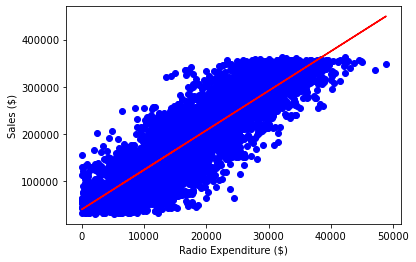

In [21]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## **Ejercicio 4 - Ajustar y predecir para la regresión**

Ahora que has visto cómo funciona la regresión lineal, tu tarea consiste en crear un modelo de regresión lineal múltiple utilizando todas las características del conjunto de datos `sales_df`. A continuación utilizarás este modelo para predecir las ventas en función de los valores de las características de prueba.

### **Instrucciones**
1. Crea `X`, una matriz que contenga los valores de todas las características de `sales_df`, e `y`, que contenga todos los valores de la columna "sales".
2. Instancia un modelo de regresión lineal.
3. Ajusta el modelo a los datos de entrenamiento.
4. Crea y_pred, haciendo predicciones para las ventas utilizando las características de prueba.


In [22]:
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = sales_df.drop(["sales", "influencer"] , axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## **Ejercicio 5 - Rendimiento de la regresión**

Ahora que has ajustado un modelo, `reg`, utilizando todas las características de `sales_df`, y has hecho predicciones de los valores de las ventas, puedes evaluar el rendimiento utilizando algunas métricas de regresión comunes.

Utiliza los conjuntos de entrenamiento y pruebas, así como el modelo obtenidos en el ejercicio anterior.

Tu tarea consiste en averiguar hasta qué punto las características pueden explicar la varianza de los valores objetivo, además de evaluar la capacidad del modelo para hacer predicciones sobre datos no vistos.

### **Instrucciones**
1. Importa el `mean_square_error`.
2. Calcula la puntuación R-cuadrado del modelo pasando los valores de las características de prueba y los valores del objetivo de prueba a un método apropiado.
3. Calcula el error cuadrático medio del modelo utilizando `y_test` e `y_pred`.
4. Imprime `r_squared` y `rmse`.

In [23]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600101


## **Ejercicio 6 - Validación cruzada para el R-cuadrado**

La validación cruzada es un enfoque vital para evaluar un modelo. Maximiza la cantidad de datos disponibles para el modelo, ya que éste no sólo se entrena, sino que también se prueba con todos los datos disponibles.

En este ejercicio, construirás un modelo de regresión lineal y, a continuación, utilizarás la validación cruzada de 6 iteraciones para evaluar su precisión en la predicción de las ventas mediante el gasto en publicidad en redes sociales. Mostrarás la puntuación individual de cada una de las seis iteraciones.

### **Instrucciones**
1. Importa `KFold` y `cross_val_score`.
2. Crea `kf` llamando a `KFold()`, estableciendo el número de divisiones en seis, `shuffle` a `True` y establece una semilla de 5.
3. Realiza la validación cruzada utilizando `reg` en `X` e `y` y pasando `kf` a `cv`.
4. Imprime las puntuaciones de `cv`.


In [24]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


## **Ejercicio 7 - Analizar las métricas de la validación cruzada**

Ahora que has realizado la validación cruzada, es el momento de analizar los resultados.

Mostrarás la media, la desviación estándar y el intervalo de confianza del 95% (rango intercuartil 2.5%-97.5%) para `cv_scores`, obtenido en el ejercicio anterior.

### **Instrucciones**
1. Calcula e imprime la media de los resultados.
2. Calcula e imprime la desviación típica de `cv_scores`.
3. Muestra el intervalo de confianza del 95% de tus resultados utilizando `np.quantile()`.

In [25]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


## **Ejercicio 8 - Regresión regularizada: Ridge**

La regresión Ridge realiza la regularización calculando los valores al cuadrado de los parámetros del modelo multiplicados por alfa y añadiéndolos a la función de pérdida.

En este ejercicio, ajustarás los modelos de regresión Ridge en un rango de diferentes valores de alfa, e imprimirás sus puntuaciones R2. Utilizarás todas las características del conjunto de datos `sales_df` para predecir las "ventas".

Se proporciona una variable llamada `alphas` como lista que contiene los diferentes valores de `alpha`, y que recorrerás en bucle para generar las puntuaciones.

### **Instrucciones**
1. Importa Ridge.
2. Instancia Ridge, estableciendo alfa igual a `alpha`.
3. Ajusta el modelo a los datos de entrenamiento.
4. Calcula la puntuación de cada iteración de Ridge.

In [26]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


## **Ejercicio 9 - Regresión Lasso para la importancia de las características**

La regresión Lasso se puede utilizar para identificar características importantes en un conjunto de datos.

En este ejercicio, ajustarás un modelo de regresión Lasso a los datos de `sales_df` y trazarás los coeficientes del modelo.

### **Instrucciones**
1. Importa `Lasso` de `sklearn.linear_model`.
2. Instala un regresor Lasso con un alfa de 0,3.
3. Ajusta el modelo a los datos.
4. Calcula los coeficientes del modelo, almacenándolos como `lasso_coef`.


[ 3.56289375e+00  3.07776096e-03 -2.86451291e-02]


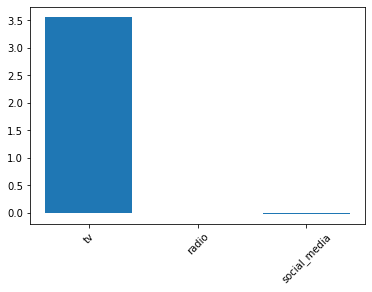

In [27]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X_train, y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

sales_columns = sales_df.drop(["sales", "influencer"] , axis=1).columns

plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

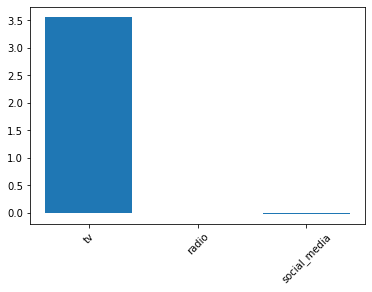

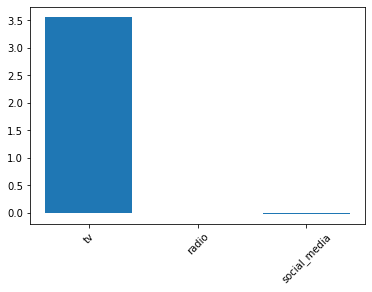

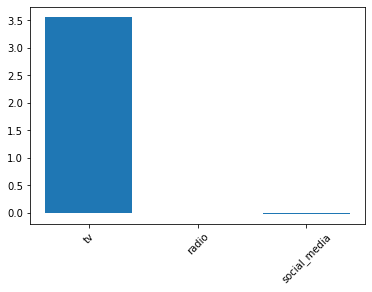

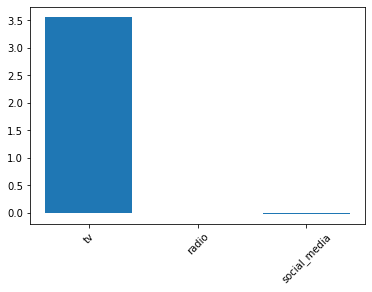

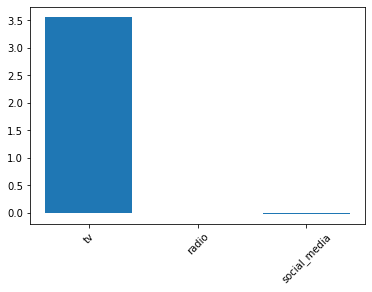

[0.9990152104762495, 0.9990152105072274, 0.9990152107889495, 0.9990152111033483, 0.9990152120375869]


In [30]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
    plt.bar(sales_columns, lasso.coef_)
    plt.xticks(rotation=45)
    plt.show()
print(scores)